<a href="https://colab.research.google.com/github/soniafirdous/House-Analysis-Story-telling/blob/main/Revised_Copy_of_SoniaFirdous_HousingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`Housing Prices Dataset Analysis`

Author : Sonia firdous\
Email : soniafirdous1985@gmail.com\
The data was collected from the following [link]((https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

Data collected from the source has following description:\

`Description`: A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

`Purpose of Analysis`\
Understand the Dataset & cleanup (if required).



#IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#LOADING DATA

In [2]:
df=pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#INITIAL INSPECTION

---



In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.shape

(545, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [67]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


#DATA CLEANING

In [8]:
missing=df.isnull().sum()
missing

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [72]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [71]:
df.duplicated().value_counts()

,count
False,545


#DESCRIPTIVE STATICS

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


SEPERATING NUMERICAL AND CATEGORICAL COLUMNS

NUMERICAL CLOUMNS

In [10]:
num_column=df.select_dtypes(include=["int64","float64"]).columns
print(num_column)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


CATEGORICAL COLUMNS

In [11]:
cat_column=df.select_dtypes(include=["bool","object","category"]).columns
print(cat_column)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


#Exploring numerical columns

In [12]:
df_numerical=df[num_column]
df_numerical

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


#COMPUTE STATISTICS

In [13]:

for col in df_numerical:
  print(f"Stats summary for {col} :\n")
  print(f"Mean:{df[col].mean()}")
  print(f"Median:{df[col].median()}")
  print(f"Mode:{df[col].mode()[0]}")
  print(f"Standard deviation:{df[col].std()}")
  print(f"variance:{df[col].var()}")
  print(f"Skewness:{df[col].skew()}")
  print(f"Kurtosis:{df[col].kurt()}")
  print(f"Maximum:{df[col].max()}")
  print(f"Minimum:{df[col].min()}")

Stats summary for price :

Mean:4766729.247706422
Median:4340000.0
Mode:3500000
Standard deviation:1870439.615657394
variance:3498544355820.5796
Skewness:1.2122388370279802
Kurtosis:1.9601302314151994
Maximum:13300000
Minimum:1750000
Stats summary for area :

Mean:5150.54128440367
Median:4600.0
Mode:6000
Standard deviation:2170.141022508803
variance:4709512.057575553
Skewness:1.321188343153483
Kurtosis:2.7514801872608086
Maximum:16200
Minimum:1650
Stats summary for bedrooms :

Mean:2.9651376146788992
Median:3.0
Mode:3
Standard deviation:0.738063860568575
variance:0.5447382622773889
Skewness:0.49568394074553473
Kurtosis:0.7283228752894284
Maximum:6
Minimum:1
Stats summary for bathrooms :

Mean:1.2862385321100918
Median:1.0
Mode:1
Standard deviation:0.502469616053218
variance:0.2524757150566683
Skewness:1.5892635781317528
Kurtosis:2.164856463809789
Maximum:4
Minimum:1
Stats summary for stories :

Mean:1.8055045871559634
Median:2.0
Mode:2
Standard deviation:0.8674924629255298
variance:0.7

#DATA VISUALIZATION

##Histogram for numerical column

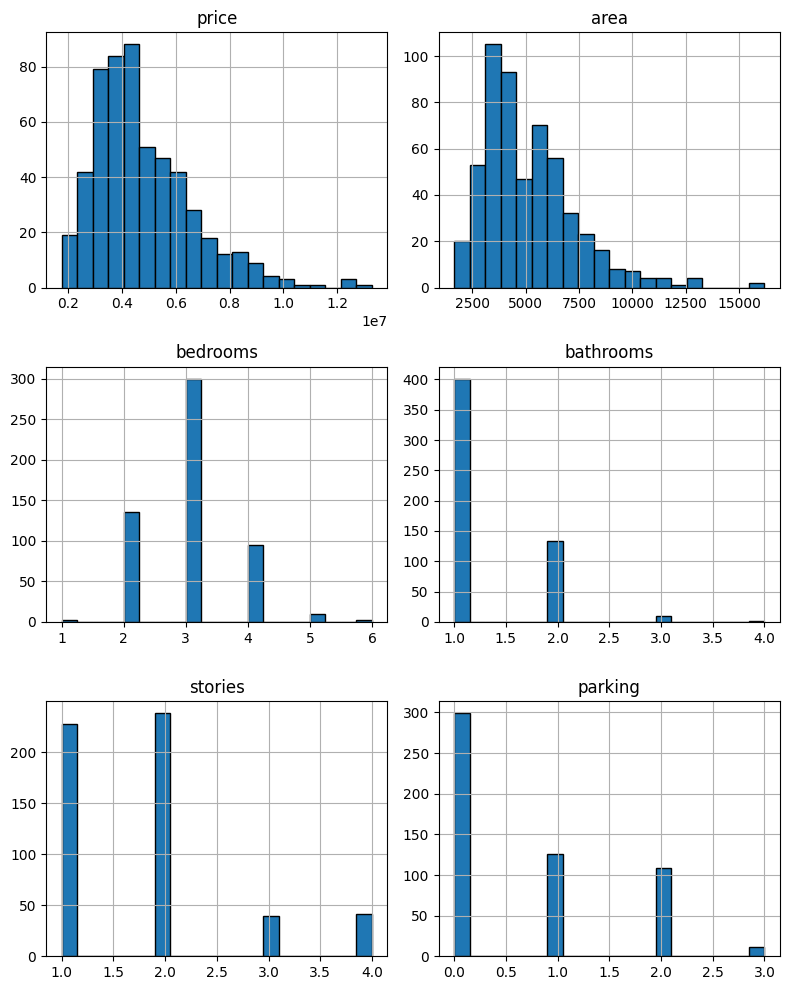

In [14]:
df_numerical.hist(figsize=(8,10),bins=20,edgecolor="black")
plt.tight_layout()
plt.show()

##Boxplot to detect outliers

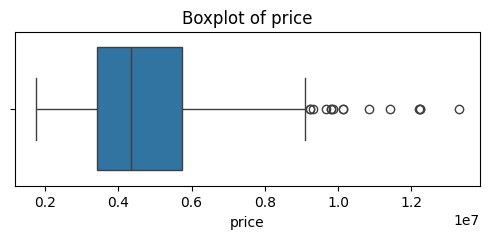

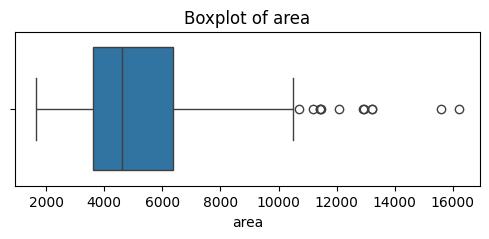

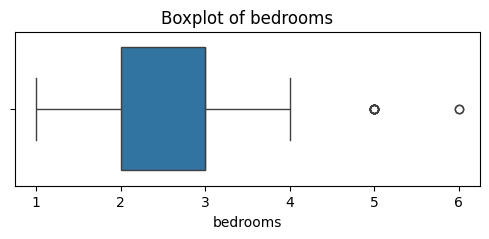

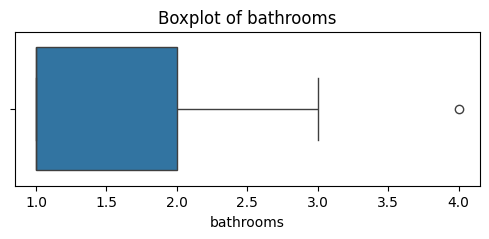

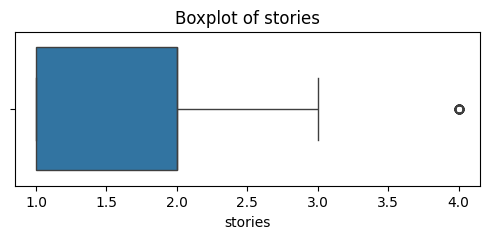

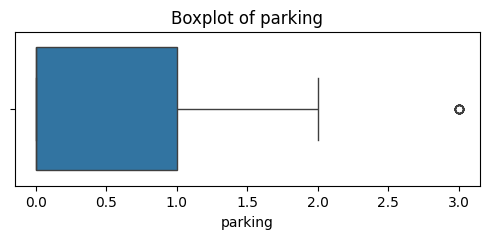

In [15]:
#use of for loop to get boxplot of very column in list if num_column

for col  in num_column:
  plt.figure(figsize=(6,2))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

# UNIVARIATE ANALYSIS


1.   PRICE
2.   AREA
3.   BEDROOMS



##Price Analysis

cheapest house cost 1,750,000

most expensive house cost 13,300,000

25% houses cost below Q1=3430000

75% houses cost above Q3=5740000

Middle houses price are IQR= 2310000

central tendency:

mean > median
right skewed(some very high prices are pulling mean upward)
variability:

* high standard deviation show high spread
* a wide box of middle 50% priced houses shows high  variability in housing prices--IQR=231000,this spread is quite large
* because outliers are on right ,it indicates rightskewed distribution
* median line in boxplot is closer left edge of box showing rightskewness
* prices deviate  on average ±39% from the mean price and shows moderate variability that is the prices are not tightly packed around the mean



In [16]:
df["price"].describe()

,price
count,5.450000e+02
mean,4.766729e+06
std,1.870440e+06
min,1.750000e+06
25%,3.430000e+06
50%,4.340000e+06
75%,5.740000e+06
max,1.330000e+07


In [17]:
#calculation coefficent of variation
mean_price = df["price"].mean()
std_price = df["price"].std()

cv_percent= (std_price / mean_price)*100

print("Coeff of variation (%):", cv_percent)

Coeff of variation (%): 39.23947676611551


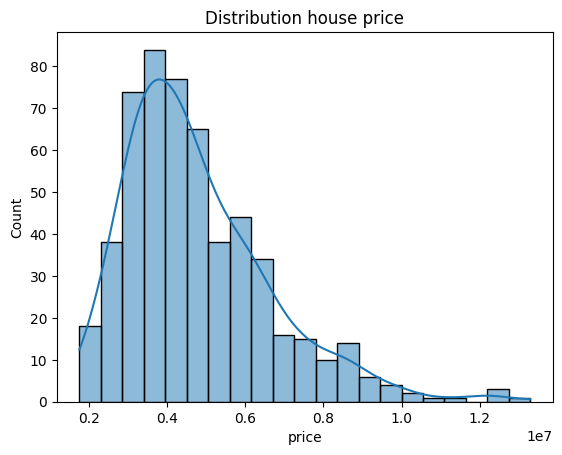

In [18]:
sns.histplot(data=df,x="price",kde=True)
plt.title("Distribution house price")
plt.xlabel("price")
plt.ylabel("Count")
plt.show()

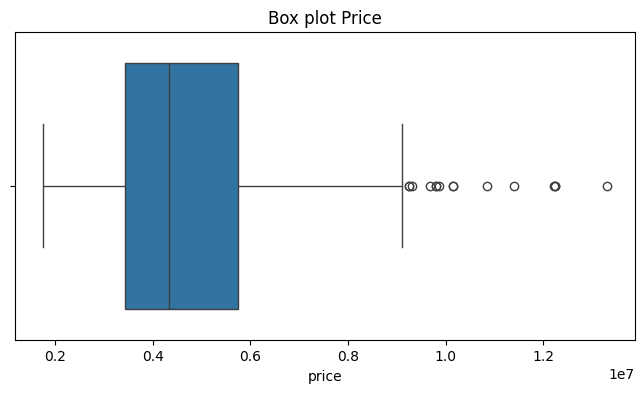

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="price")
plt.title("Box plot Price")
plt.xlabel("price")
plt.show()

In [20]:
Q1_price=df["price"].quantile(0.25)
Q1_price

np.float64(3430000.0)

In [21]:
Q3_price=df["price"].quantile(0.75)
Q3_price

np.float64(5740000.0)

In [22]:
IQR_price=Q3_price-Q1_price
IQR_price

np.float64(2310000.0)

In [23]:
lower_bound_price=Q1_price-1.5*IQR_price
lower_bound_price

np.float64(-35000.0)

In [24]:
upper_bound_price=Q3_price+1.5*IQR_price
upper_bound_price

np.float64(9205000.0)

In [25]:
outliers_price=(df["price"]<lower_bound_price)|(df["price"]>upper_bound_price)
outliers_price

,price
0,True
1,True
2,True
3,True
4,True
...,...
540,False
541,False
542,False
543,False


In [26]:
df[outliers_price]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [27]:
df.loc[outliers_price,"price"]

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
5,10850000
6,10150000
7,10150000
8,9870000
9,9800000


In [28]:
df.loc[outliers_price,"price"].value_counts().sort_index()

,count
price,
9240000,2
9310000,1
9681000,1
9800000,2
9870000,1
10150000,2
10850000,1
11410000,1
12215000,1


#AREA

  ## Area analysis

* smallest house area is 1650.000000

* largest house area is 16200.000000


* 25% houses arae below Q1=3600.000000

* 75% houses area above Q3=6360.000000

* Middle houses area IQR= 4600.000000

* central tendency:
     * mean > median
     * right skewed(some large house area are pulling mean upward)

* variability:

      * high standard deviation show high spread
      * a wide box of middle 50% house area  shows high  variability in housing areas--IQR=2760.0,this spread is quite large
      * because outliers are on right ,it indicates rightskewed distribution
      * median line in boxplot is closer left edge of box showing rightskewness
      * CV= 42.13% shows the standard deviation of area is 42% of the mean area  i.e  area varies moderately relative to its average



In [29]:
df["area"]

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


In [30]:
df["area"].describe()

,area
count,545.000000
mean,5150.541284
std,2170.141023
min,1650.000000
25%,3600.000000
50%,4600.000000
75%,6360.000000
max,16200.000000


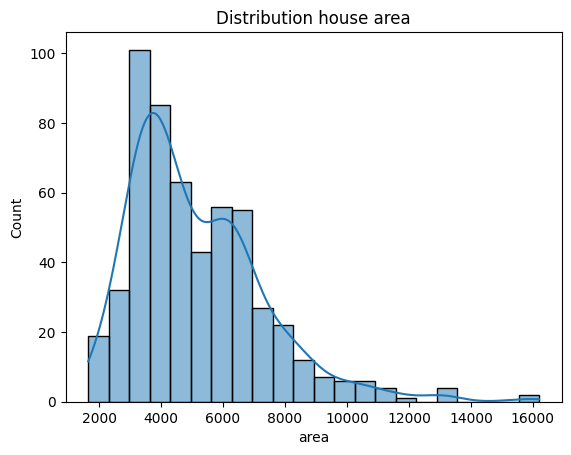

In [31]:
sns.histplot(data=df,x="area",kde=True)
plt.title("Distribution house area")
plt.xlabel("area")
plt.ylabel("Count")
plt.show()

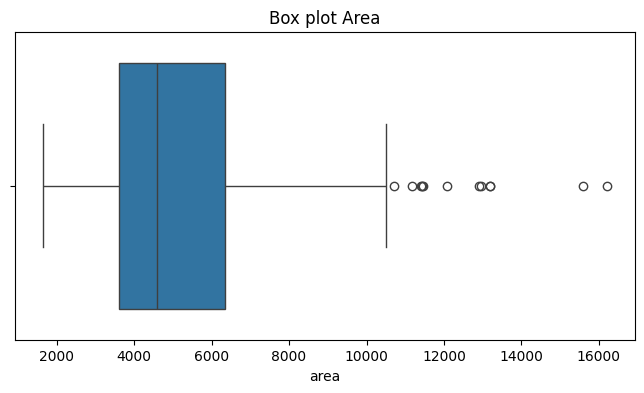

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="area")
plt.title("Box plot Area")
plt.xlabel("area")
plt.show()

In [33]:
area_mean=df["area"].mean()
area_mean
area_std=df["area"].std()
area_std
cv_area=(area_std/area_mean)*100
cv_area

np.float64(42.13423216468911)

In [34]:
Q1_area=df["area"].quantile(0.25)
Q3_area=df["area"].quantile(0.75)
IQR_area=Q3_area-Q1_area
print("Q1:",Q1_area)
print("Q3:",Q3_area)
print("IQR:",IQR_area)

Q1: 3600.0
Q3: 6360.0
IQR: 2760.0


In [35]:
upper_bound_area=Q3_area+1.5*IQR_area
upper_bound_area


np.float64(10500.0)

In [36]:
lower_bound_area=Q1_area-1.5*IQR_area
lower_bound_area

np.float64(-540.0)

In [37]:
outliers_area=(df["area"]<lower_bound_area)|(df["area"]>upper_bound_area)
outliers_area

,area
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [38]:
df.loc[outliers_area,"area"]

,area
7,16200
10,13200
56,11440
64,11175
66,13200
69,12090
125,15600
129,11460
186,11410
191,10700


In [39]:
df.loc[outliers_area,"area"].shape[0] #total outliers

12

#BEDROOMS

##Bedroom analysis

Minumum bedroom count is 1

Maximum bedroom count is 6

25% houses have less than 2 bedrooms

75% houses have less than 3 bedrooms

Middle houses have

central tendency:

mean almost equal to median
mild right skewed

variability:

* low standard deviation show low spread
* IQR=1,this spread is quite small,distribution concebtrated around 3 bedrooms
* because outliers are on right ,it indicates rightskewed distribution
* outliers values >5 bedrooms are potentional outliers
* 10 houses with 5 bedrooms & 2 houses with 6 bedrooms are cause of skewness
* 300 houses have 3 bedrooms
* Most Houses with 3 bedroom worth around =	4.954598



In [40]:
df["bedrooms"]

,bedrooms
0,4
1,4
2,3
3,4
4,4
...,...
540,2
541,3
542,2
543,3


In [41]:
df["bedrooms"].describe()

,bedrooms
count,545.000000
mean,2.965138
std,0.738064
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,6.000000


In [42]:
df["bedrooms"].value_counts().sort_index()

,count
bedrooms,
1,2
2,136
3,300
4,95
5,10
6,2


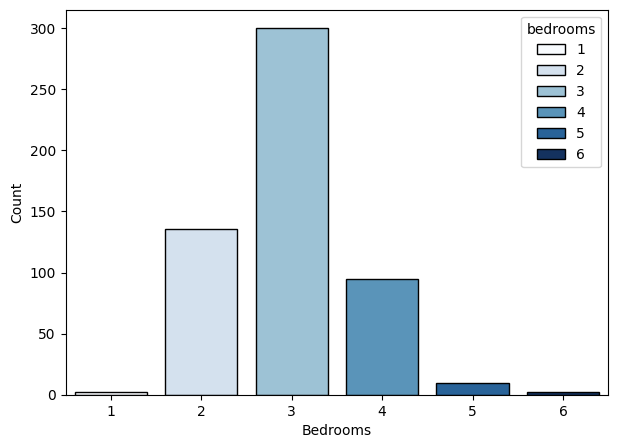

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="bedrooms",hue="bedrooms",palette="Blues",edgecolor="black")
plt.title=("Number of houses by bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

In [44]:
import sys, importlib
import matplotlib.pyplot as plt

importlib.reload(sys.modules['matplotlib.pyplot'])
print(type(plt.title))


<class 'function'>


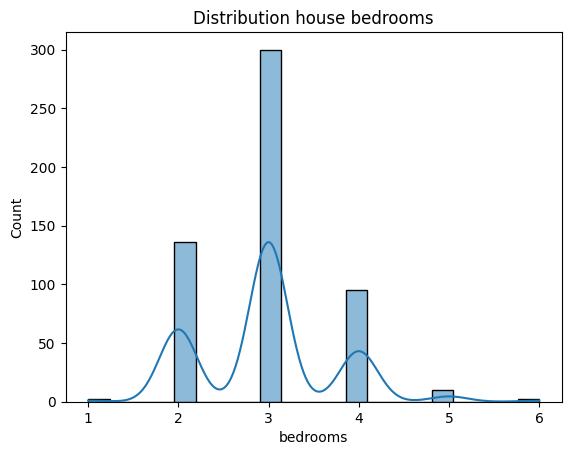

In [45]:
sns.histplot(data=df,x="bedrooms",kde=True)
plt.title("Distribution house bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("Count")
plt.show()

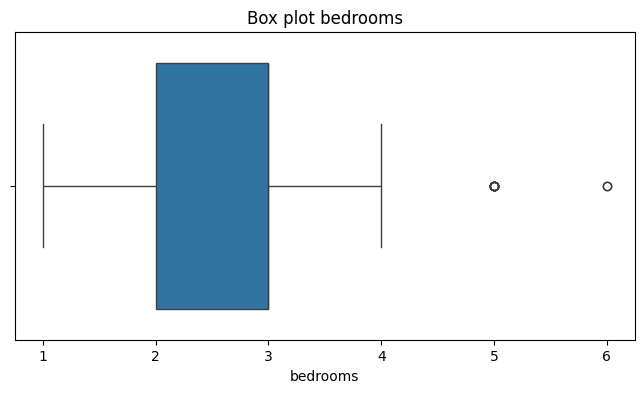

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x="bedrooms")
plt.title("Box plot bedrooms")
plt.xlabel("bedrooms")
plt.show()

In [47]:
Q1_bedrooms=df["bedrooms"].quantile(0.25)
Q3_bedrooms=df["bedrooms"].quantile(0.75)
IQR_bedrooms=Q3_bedrooms-Q1_bedrooms
print("Q1:",Q1_bedrooms)
print("Q3:",Q3_bedrooms)
print("IQR:",IQR_bedrooms)


Q1: 2.0
Q3: 3.0
IQR: 1.0


In [48]:
upper_bound_bedrooms=Q3_bedrooms+1.5*IQR_bedrooms
upper_bound_bedrooms


np.float64(4.5)

In [49]:
lower_bound_bedrooms=Q1_bedrooms-1.5*IQR_bedrooms
lower_bound_bedrooms


np.float64(0.5)

In [50]:
outliers_bedrooms=(df["bedrooms"]<lower_bound_bedrooms)|(df["bedrooms"]>upper_bound_bedrooms)
outliers_bedrooms

,bedrooms
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [51]:
df.loc[outliers_bedrooms,"bedrooms"]

,bedrooms
7,5
28,5
34,5
89,5
112,6
143,5
152,5
271,5
340,5
356,5


In [52]:
df.loc[outliers_bedrooms,"bedrooms"].value_counts()

,count
bedrooms,
5,10
6,2


In [53]:
df.loc[outliers_bedrooms,"bedrooms"].shape[0]

12

#MULTIVARIATE ANALYSIS-------EXPLORING RELATIONSHIPS


CORRELATION ANALYSIS
Interpreted results:
Values range from -1 to 1:
1: Perfect positive correlation
-1: Perfect negative correlation
0: No correlation

In [78]:
corr_data=df_numerical.corr()
corr_data

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [87]:
corr_data[corr_data>0.5]

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,NaN,0.517545,NaN,NaN
area,0.535997,1.000000,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN
bathrooms,0.517545,NaN,NaN,1.000000,NaN,NaN
stories,NaN,NaN,NaN,NaN,1.0,NaN
parking,NaN,NaN,NaN,NaN,NaN,1.0


In [103]:
strong_corr=corr_data[(corr_data>0.5)&(corr_data!=1)]
strong_corr

,price,area,bedrooms,bathrooms,stories,parking
price,NaN,0.535997,NaN,0.517545,NaN,NaN
area,0.535997,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.517545,NaN,NaN,NaN,NaN,NaN
stories,NaN,NaN,NaN,NaN,NaN,NaN
parking,NaN,NaN,NaN,NaN,NaN,NaN


how many other features each variable is strongly correlated with (above 0.5)

In [104]:

strong_corr = (corr_data > 0.5) & (corr_data < 1)
strong_corr.sum()

,0
price,2
area,1
bedrooms,0
bathrooms,1
stories,0
parking,0


In [106]:
corr_data

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


#EXTRACTING CORRELATED PAIRS

masking upper triangles (excluding duplicates and self correlations)

In [107]:
mask=np.triu(np.ones_like(corr_data,dtype=bool),k=1)
mask

array([[False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [False, False, False, False, False, False]])

corr.where(mask): Replaces everything not in the upper triangle with NaN.

In [109]:

masked_corr=pd.DataFrame(corr_data.where(mask),index=corr_data.index,columns=corr_data.columns)
masked_corr

,price,area,bedrooms,bathrooms,stories,parking
price,NaN,0.535997,0.366494,0.517545,0.420712,0.384394
area,NaN,NaN,0.151858,0.193820,0.083996,0.352980
bedrooms,NaN,NaN,NaN,0.373930,0.408564,0.139270
bathrooms,NaN,NaN,NaN,NaN,0.326165,0.177496
stories,NaN,NaN,NaN,NaN,NaN,0.045547
parking,NaN,NaN,NaN,NaN,NaN,NaN


EXTRACTING STRONG RELATIONSHIPS

In [114]:
threshold=0.5
strong_corr=masked_corr.stack()
strong_corr

price      area         0.535997
           bedrooms     0.366494
           bathrooms    0.517545
           stories      0.420712
           parking      0.384394
area       bedrooms     0.151858
           bathrooms    0.193820
           stories      0.083996
           parking      0.352980
bedrooms   bathrooms    0.373930
           stories      0.408564
           parking      0.139270
bathrooms  stories      0.326165
           parking      0.177496
stories    parking      0.045547
dtype: float64

In [115]:
strong_corr = strong_corr[strong_corr.abs() > threshold]
strong_corr

price  area         0.535997
       bathrooms    0.517545
dtype: float64

Print correlated pairs

In [116]:
for pair in strong_corr.index:
  col1,col2=pair
  value=strong_corr[pair]
  print(f"{col1} <-> {col2} ={value}")

price <-> area =0.5359973457780797
price <-> bathrooms =0.517545339455012


#Visualize correlations

use of heat map for better visualization of correlation matrix

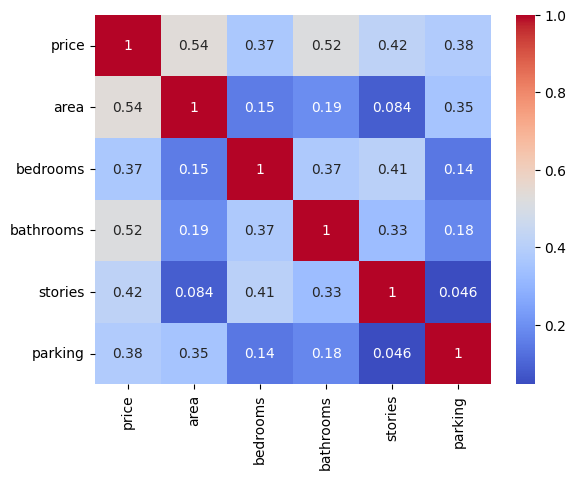

In [79]:
sns.heatmap(corr_data,annot=True,cmap="coolwarm")
plt.show()

#GROUP ANALYSIS

##`1.PRICE VS AREA`


* Both kurtosis values are positive, so both distributions are more peaked and have heavier tails than a normal distribution

* area  is more heavily tailed than price This suggests more extreme values/outliers in area.


* the scatter plot show a positive trend as area increases ,larger houses cost increases

* at larger areas prices vary more

* many points are concentrated between area=2500-6000
price=0.3-0.6
these dense cluster shows there are more mid-sized homes in mid-range prices

* a few houses have large area >12000 or high prices>1.2

In [54]:
price_vs_area_stats=df[["area","price"]].describe()
price_vs_area_stats

,area,price
count,545.000000,5.450000e+02
mean,5150.541284,4.766729e+06
std,2170.141023,1.870440e+06
min,1650.000000,1.750000e+06
25%,3600.000000,3.430000e+06
50%,4600.000000,4.340000e+06
75%,6360.000000,5.740000e+06
max,16200.000000,1.330000e+07


In [55]:
df[["area","price"]].skew()

,0
area,1.321188
price,1.212239


In [56]:
df[["area","price"]].kurt()

,0
area,2.75148
price,1.96013


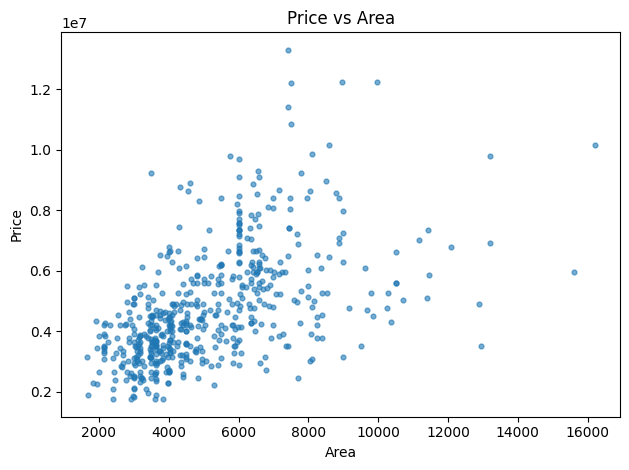

In [57]:
subset = df[["area", "price"]]

fig, ax = plt.subplots()
ax.scatter(subset["area"], subset["price"], s=12, alpha=0.6)
ax.set_xlabel("Area")
ax.set_ylabel("Price")
ax.set_title("Price vs Area")
plt.tight_layout()
plt.show()

##GROUP BY


This approach helps to analyze how price varies with different ranges of area, providing valuable insights into the relationship between these two variables.
```
`0-4000 sq ft:` The average price is  approximately $3.60 million.

`4000-6000 sq ft:` The average price increases to about $4.95 million.

`6000-8000 sq ft:` The average price further rises to around $6.06 million.

`8000+ sq ft:` The average price peaks at approximately $6.17 million.

This indicates a trend where larger areas tend to have higher average prices

In [117]:
# creating a new column
bins=[0, 4000, 6000, 8000, 20000]
labels = ['0-4000', '4000-6000', '6000-8000', '8000+']
df["area_category"]=pd.cut(df["area"],bins=bins,labels=labels)

In [118]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_category
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6000-8000
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8000+


In [119]:
grouped = df.groupby('area_category')['price'].mean()
print(grouped)


area_category
0-4000       3.596292e+06
4000-6000    4.948014e+06
6000-8000    6.063812e+06
8000+        6.173736e+06
Name: price, dtype: float64


/tmp/ipython-input-1726711144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('area_category')['price'].mean()


In [120]:
grouped = df.groupby('area_category')['price'].mean().reset_index()
print(grouped)


  area_category         price
0        0-4000  3.596292e+06
1     4000-6000  4.948014e+06
2     6000-8000  6.063812e+06
3         8000+  6.173736e+06


/tmp/ipython-input-752041927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('area_category')['price'].mean().reset_index()


##MULTIPLE AGGREGATE

aggregate helps me using different functions to summarize the data stats effectively

Trends:

There is a clear trend of increasing mean price with larger area categories.
The 0-4000 sq ft category has the highest count of properties, while the 8000+ sq ft category has the lowest count.

Total Sales:

The total sum of prices reflects the overall market activity, with the 4000-6000 sq ft category generating the highest total sales.



In [124]:
grouped_stats = df.groupby('area_category')['price'].agg(['mean', 'sum', 'count']).reset_index()
print(grouped_stats)

  area_category          mean        sum  count
0        0-4000  3.596292e+06  744432500    207
1     4000-6000  4.948014e+06  895590500    181
2     6000-8000  6.063812e+06  630636440    104
3         8000+  6.173736e+06  327208000     53


/tmp/ipython-input-2989563707.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df.groupby('area_category')['price'].agg(['mean', 'sum', 'count']).reset_index()


#BAR CHART TO VISUALIZE THE STATS FOR EACH CATEGORY

In [128]:
data_stats=pd.DataFrame(grouped_stats)
data_stats

,area_category,mean,sum,count
0,0-4000,3.596292e+06,744432500,207
1,4000-6000,4.948014e+06,895590500,181
2,6000-8000,6.063812e+06,630636440,104
3,8000+,6.173736e+06,327208000,53


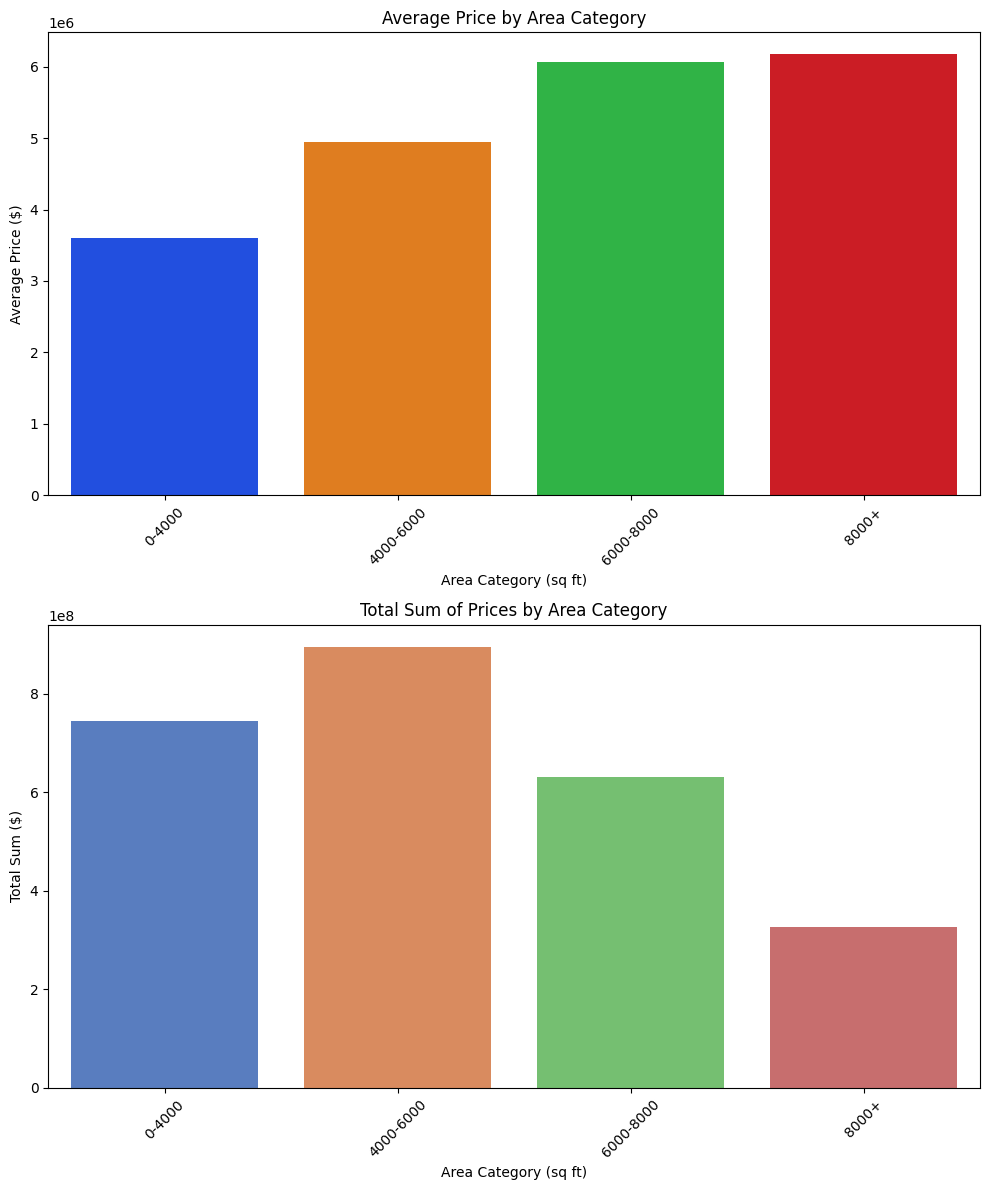

In [142]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bar plot for mean prices

sns.barplot(x='area_category', y='mean', hue='area_category',data=data_stats, palette='bright', ax=axes[0])
axes[0].set_title('Average Price by Area Category')
axes[0].set_xlabel('Area Category (sq ft)')
axes[0].set_ylabel('Average Price ($)')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for total sum of prices

sns.barplot(x='area_category', y='sum', hue='area_category', data=data_stats, palette='muted', ax=axes[1])
axes[1].set_title('Total Sum of Prices by Area Category')
axes[1].set_xlabel('Area Category (sq ft)')
axes[1].set_ylabel('Total Sum ($)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##`2.PRICE VS BATHROOM`

Mean price rises from 1→5 bedrooms, but the increment per extra bedroom shrinks:

1→2: +919,522

2→3: +1,322,576 (largest jump)

3→4: +775,160

4→5: +90,042

5→6: -1,028,300

Mean> Median across groups: rightskewed prices (a few high outliers pulling the mean up)


In [58]:
df.groupby("bathrooms")["price"].value_counts()

bathrooms  price   
1          3500000     16
           4200000     12
           4900000     12
           2940000      8
           3150000      8
                       ..
3          6440000      1
           8190000      1
           9681000      1
           10850000     1
4          12250000     1
Name: count, Length: 269, dtype: int64

In [59]:
df.groupby("bathrooms")["price"].mean()

,price
bathrooms,
1,4.206913e+06
2,6.209206e+06
3,7.282100e+06
4,1.225000e+07


In [60]:

df.groupby("bathrooms")["price"].median()


,price
bathrooms,
1,3990000.0
2,6090000.0
3,7315000.0
4,12250000.0


In [61]:
df.groupby("bathrooms")["price"].agg(["mean","median","max"])

,mean,median,max
bathrooms,,,
1,4.206913e+06,3990000.0,11410000
2,6.209206e+06,6090000.0,13300000
3,7.282100e+06,7315000.0,10850000
4,1.225000e+07,12250000.0,12250000


In [64]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

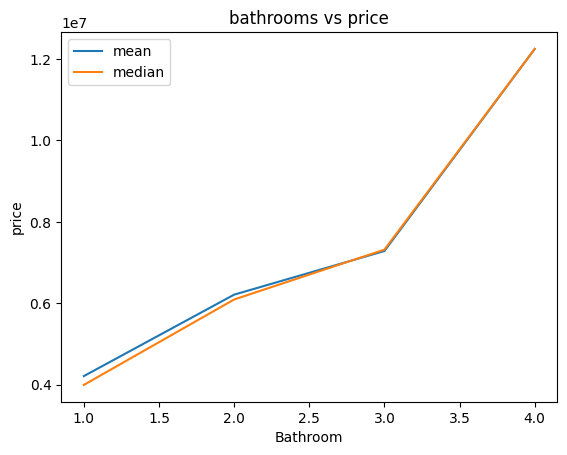

In [143]:
df.groupby('bathrooms')['price'].agg(['mean', 'median']).plot()
plt.title('bathrooms vs price')
plt.xlabel('Bathroom')
plt.ylabel('price')
plt.show()


In [148]:
stats_bathroom=df.groupby('bathrooms')['price'].agg(['mean', 'median','max']).reset_index()
stats_bathroom

,bathrooms,mean,median,max
0,1,4.206913e+06,3990000.0,11410000
1,2,6.209206e+06,6090000.0,13300000
2,3,7.282100e+06,7315000.0,10850000
3,4,1.225000e+07,12250000.0,12250000


#` Bar chart to compare the mean, median, and maximum prices for different bathroom counts`

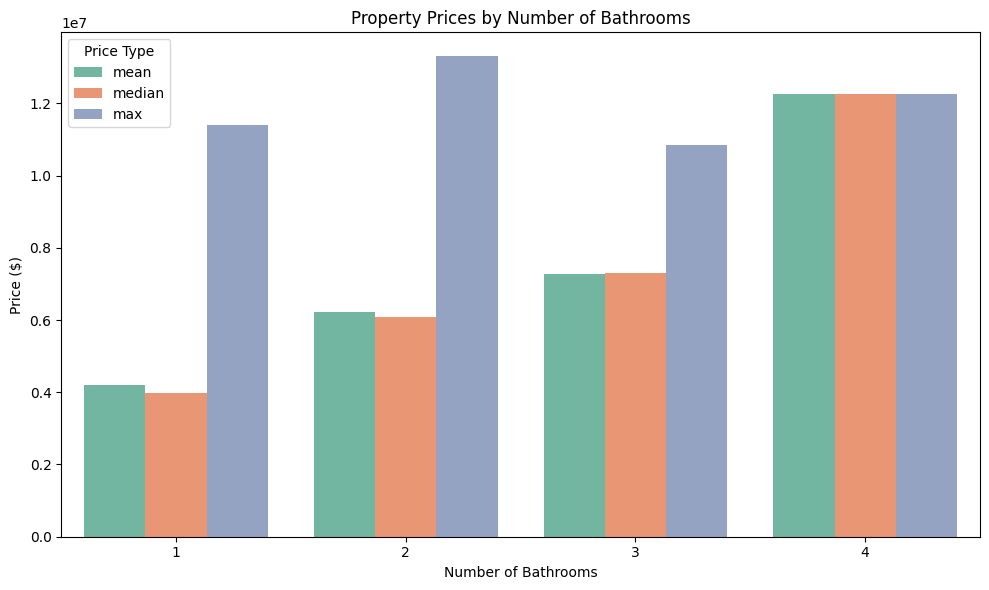

In [149]:

# Melt the DataFrame for easier plotting
df_melted = stats_bathroom.melt(id_vars='bathrooms', value_vars=['mean', 'median', 'max'],
                    var_name='Price Type', value_name='Price')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='bathrooms', y='Price', hue='Price Type', data=df_melted, palette='Set2')
plt.title('Property Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price ($)')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

#`STORY TELLING`

##`MY FINDINGS` :

Trends:

There is a clear trend of increasing mean price with larger area categories.
The 0-4000 sq ft category has the highest count of properties, while the 8000+ sq ft category has the lowest count.

As the number of bathrooms increases, both the mean and median prices tend to rise significantly. This indicates a correlation between the number of bathrooms and property value.

The maximum prices also show substantial increases, especially highlighting that properties with 4 bathrooms can reach a maximum price that is equal to its mean and median.

Total Sales:

The total sum of prices reflects the overall market activity, with the 4000-6000 sq ft category generating the highest total sales.



#`INTERPRETATION:`

*I explore the housing dataset and i found most homes cluster in the middle market with mid sized houses and mid range prices.The mean price is pushed by a few very expensive houses so median gives a better idea  of moderate house.There are some outliers indicating large areas and high prices.Prices generally increase with the number of bedrooms but there is some overlap indicating bedroom alone is not explaining price differences so best to compare median and to group houses by other features like stories,mainroad access,furnishing status etc for a clearer view.
Buyers should focus on median prices for similarsized homes ,sellers should price by comparing to the same size and features.*






